In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
df = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# EDA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

## Quick Distribution of Categorical Data

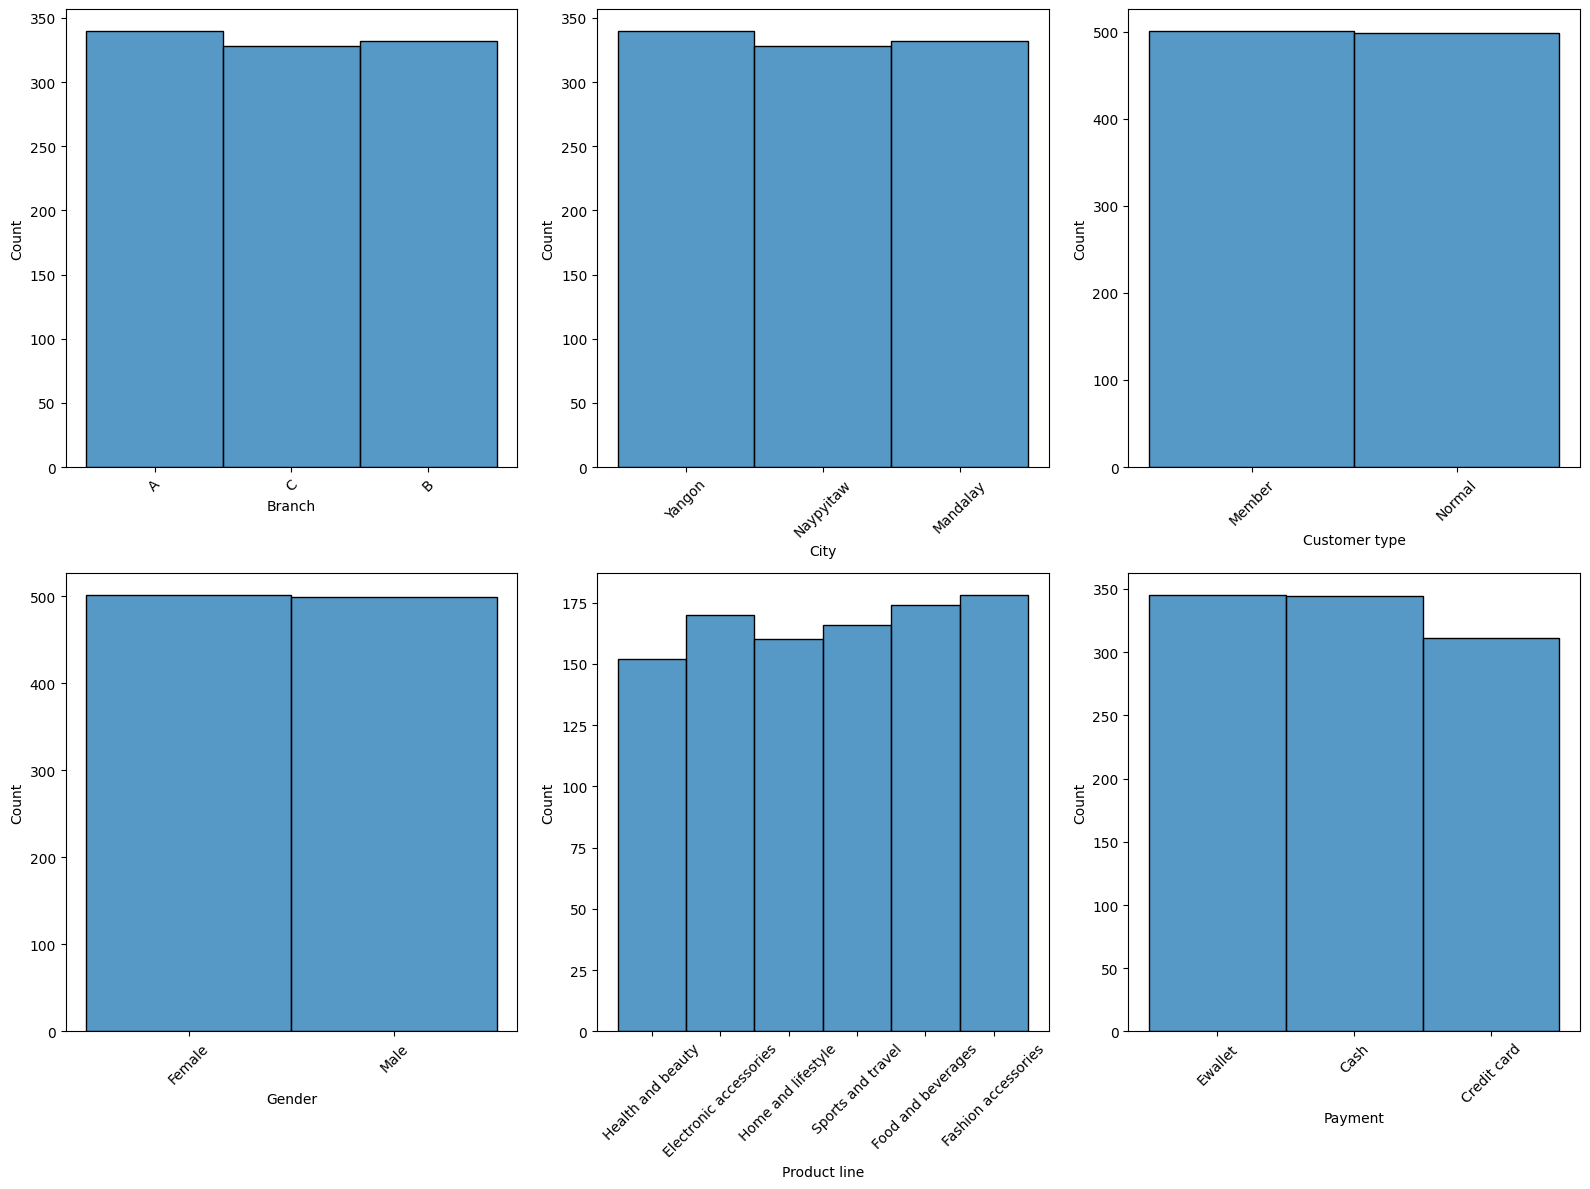

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))

cols = df[["Branch", "City", "Customer type", "Gender", "Product line", "Payment"]]

for i, column in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.histplot(x=cols[column], ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()




### Product's Max and Min Price 

In [6]:
max_prices = df.groupby("Product line")["Unit price"].max().reset_index()
min_prices = df.groupby("Product line")["Unit price"].min().reset_index()

product_min_max = pd.concat([max_prices, min_prices["Unit price"]], axis=1, join='inner')
product_min_max.columns =["Product line","Max Price","Min Price"]

In [7]:
product_min_max

,Product line,Max Price,Min Price
0,Electronic accessories,99.73,10.56
1,Fashion accessories,99.89,10.18
2,Food and beverages,99.79,10.13
3,Health and beauty,99.96,10.08
4,Home and lifestyle,99.92,10.53
5,Sports and travel,99.96,10.17


### Product's Sum Of Total Sales

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electronic accessories'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Health and beauty'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Sports and travel')])

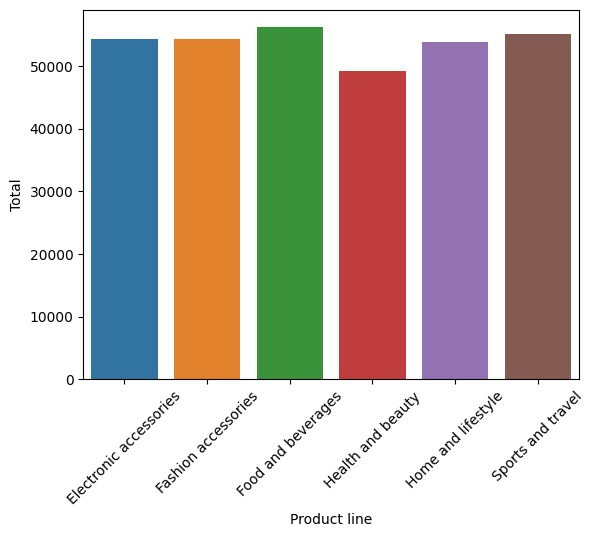

In [8]:
total_sales = df.groupby("Product line")["Total"].sum().reset_index()
sns.barplot(x=total_sales["Product line"],y=total_sales["Total"])
plt.xticks(rotation=45)

### Product's Sum Of Units Sold

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electronic accessories'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Health and beauty'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Sports and travel')])

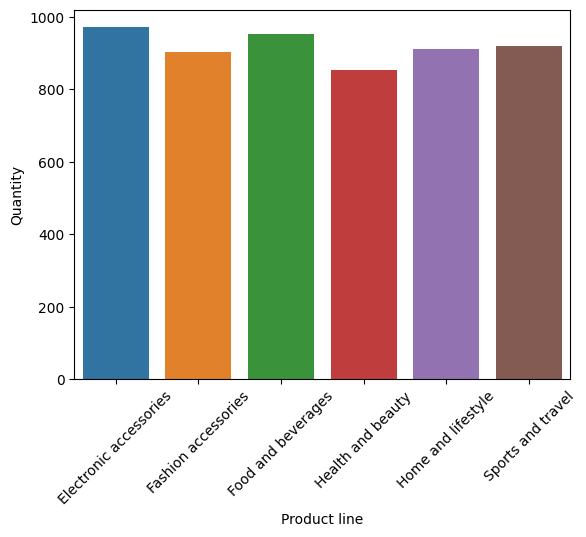

In [9]:
total_quan = df.groupby("Product line")["Quantity"].sum().reset_index()
sns.barplot(x=total_quan["Product line"],y=total_quan["Quantity"])
plt.xticks(rotation=45)

### Product's Max an Min Cost

In [10]:
max_cost =  df.loc[df.groupby(["Product line"])["cogs"].idxmax()]
min_cost = df.loc[df.groupby(["Product line"])["cogs"].idxmin()]

max_cost = max_cost.rename(columns={"cogs":"Max Cost"})
min_cost = min_cost.rename(columns={"cogs":"Min Cost"})

mean_cost= df.groupby(["Product line"])["cogs"].mean()/df.groupby(["Product line"])["Quantity"].mean()
mean_cost = pd.DataFrame(mean_cost,columns=["Mean Cost"])

min_max_cost = max_cost.merge(min_cost["Min Cost"],on=max_cost["Product line"],how="left")
min_max_cost = min_max_cost[["Product line","Max Cost","Quantity","Min Cost"]]
min_max_cost["Max Cost"] =min_max_cost["Max Cost"]/min_max_cost["Quantity"]

min_max_cost = min_max_cost.merge(mean_cost["Mean Cost"],on=mean_cost.index,how="left")

min_max_cost.drop(["Quantity","key_0"],axis=1,inplace=True)
min_max_cost

,Product line,Max Cost,Min Cost,Mean Cost
0,Electronic accessories,99.73,25.45,53.295602
1,Fashion accessories,99.30,12.09,57.339135
2,Food and beverages,98.52,21.58,56.167311
3,Health and beauty,90.50,17.75,54.860867
4,Home and lifestyle,97.50,13.98,56.308518
5,Sports and travel,95.44,10.17,57.062967


### Product's Sum Of Cost

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electronic accessories'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Health and beauty'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Sports and travel')])

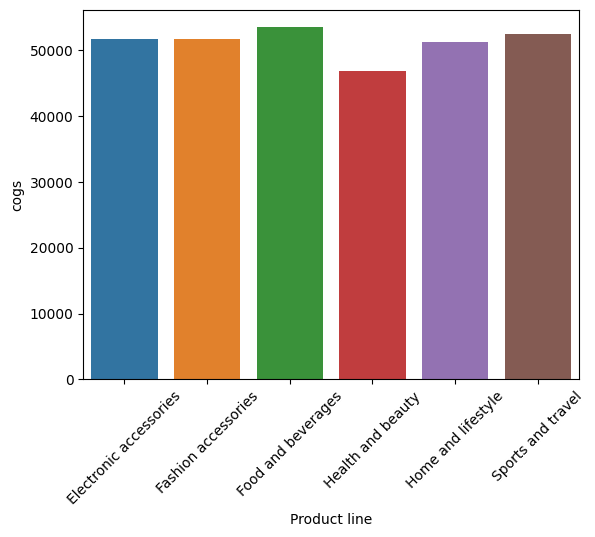

In [11]:
total_cost = df.groupby("Product line")["cogs"].sum().reset_index()
sns.barplot(x=total_cost["Product line"],y=total_cost["cogs"])
plt.xticks(rotation=45)

### Product's Ratings

In [12]:
ratings = df.groupby("Product line")["Rating"].agg(["max","min","mean"])
ratings.rename(columns={"max":"Max Rating","min": "Min Rating","mean" : "Mean Rating"},inplace=True)
ratings

,Max Rating,Min Rating,Mean Rating
Product line,,,
Electronic accessories,10.0,4.0,6.924706
Fashion accessories,9.9,4.0,7.029213
Food and beverages,9.9,4.0,7.113218
Health and beauty,10.0,4.0,7.003289
Home and lifestyle,9.9,4.1,6.837500
Sports and travel,10.0,4.0,6.916265


### Customer Type's Payment Choice Comparison

<Axes: xlabel='Payment', ylabel='Count'>

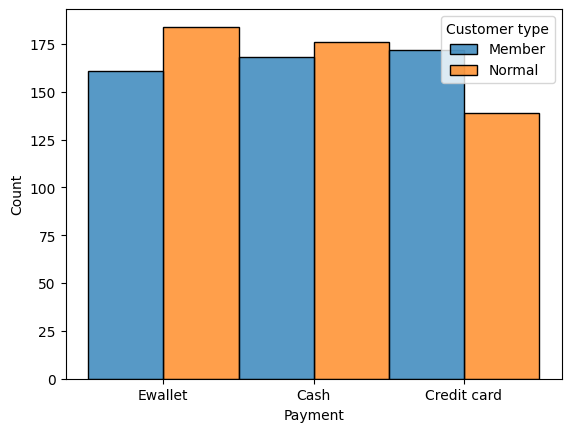

In [13]:
sns.histplot(x=df["Payment"],hue=df["Customer type"],multiple="dodge")

### Profit Margin Percentage is same for all dataset

In [14]:
round(df["gross margin percentage"].describe().astype("float64"),6)

count    1000.000000
mean        4.761905
std         0.000000
min         4.761905
25%         4.761905
50%         4.761905
75%         4.761905
max         4.761905
Name: gross margin percentage, dtype: float64

### Gross Income Statistics

In [15]:
income = df.groupby("Product line")["gross income"].agg(["sum","max","min","mean"]).reset_index()
income

,Product line,sum,max,min,mean
0,Electronic accessories,2587.5015,44.8785,1.2725,15.220597
1,Fashion accessories,2585.9950,49.6500,0.6045,14.528062
2,Food and beverages,2673.5640,49.2600,1.0790,15.365310
3,Health and beauty,2342.5590,45.2500,0.8875,15.411572
4,Home and lifestyle,2564.8530,48.7500,0.6990,16.030331
5,Sports and travel,2624.8965,47.7200,0.5085,15.812630


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electronic accessories'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Health and beauty'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Sports and travel')])

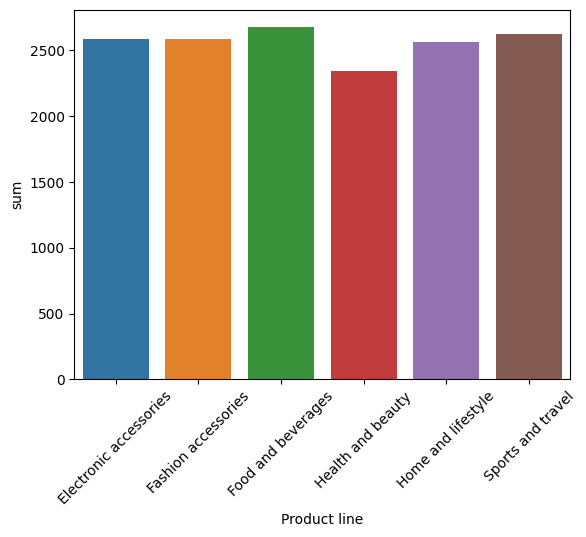

In [16]:
sns.barplot(x=income["Product line"],y=income["sum"])
plt.xticks(rotation=45)

### Dataset covers about 8 Months of  Data

In [17]:
print(f"Dataset is in Dates between :{df['Date'].min()} and {df['Date'].max()}")

Dataset is in Dates between :1/1/2019 and 3/9/2019


# PREPROCESSING

In [18]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### I am dropping these columns because the model can simply sum two of them and generate the Total. And also Invoice ID and Time is irrevelant to my opininon.

In [19]:
df_filtered = df.copy()
df_filtered = df_filtered.drop(["Invoice ID","Quantity","gross margin percentage","cogs","Time"],axis=1)

## One Hot Encoding Nominal Data

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

ohe_cols = ["Branch","City","Payment","Product line","Gender"]

encoded = encoder.fit_transform(df_filtered[ohe_cols])

encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out(ohe_cols))


df_filtered = pd.concat([df_filtered.drop(ohe_cols,axis=1),encoded],axis=1)

## Encoding Ordinal Data

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder_ = LabelEncoder()

df_filtered["Customer type"] = encoder_.fit_transform(df["Customer type"])


## Datetime Features

In [22]:
import datetime as dt

df_filtered["Date"] = pd.to_datetime(df_filtered["Date"])

df_filtered["Year"] = df_filtered["Date"].dt.year.astype("int64")
df_filtered["Month"] = df_filtered["Date"].dt.month.astype("int64")
df_filtered["Day"] = df_filtered["Date"].dt.day.astype("int64")
df_filtered.drop("Date",axis=1,inplace=True)

In [23]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Customer type                        1000 non-null   int64  
 1   Unit price                           1000 non-null   float64
 2   Tax 5%                               1000 non-null   float64
 3   Total                                1000 non-null   float64
 4   gross income                         1000 non-null   float64
 5   Rating                               1000 non-null   float64
 6   Branch_A                             1000 non-null   float64
 7   Branch_B                             1000 non-null   float64
 8   Branch_C                             1000 non-null   float64
 9   City_Mandalay                        1000 non-null   float64
 10  City_Naypyitaw                       1000 non-null   float64
 11  City_Yangon                    

## Splitting Samples and Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df_filtered.drop("Total",axis=1)
y = df_filtered["Total"]

x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaled = x_scaler.fit_transform(x)

y_scaler.fit(np.array(y).reshape(-1,1))
y_scaled = y_scaler.transform(np.array(y).reshape(-1,1))

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_scaled,test_size=0.3,random_state=42)


# MODEL TRAINING

## CatBoost Model

In [25]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.05, loss_function='RMSE', random_seed=42,verbose=0)

catboost.fit(x_train,y_train)

In [26]:
y_pred_cat  = catboost.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f"MSE : {mean_squared_error(y_test,y_pred_cat)}")
print(f"R2 Score : {r2_score(y_test,y_pred_cat)}")

MSE : 0.0017487573331103708
R2 Score : 0.9983980688746998


In [28]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(catboost, x_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Val Score : {cv_scores * -1}")
print(f"Cross Val Score Mean: {cv_scores.mean() * -1}")
print(f"Cross Val Score Std: {cv_scores.std()}")

Cross Val Score : [0.00141373 0.00032635 0.00103704 0.00055026 0.00102013]
Cross Val Score Mean: 0.000869503830126434
Cross Val Score Std: 0.00038571100163226746


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits

train_sizes, train_scores, test_scores = learning_curve(
    CatBoostRegressor(), x_scaled, y_scaled, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

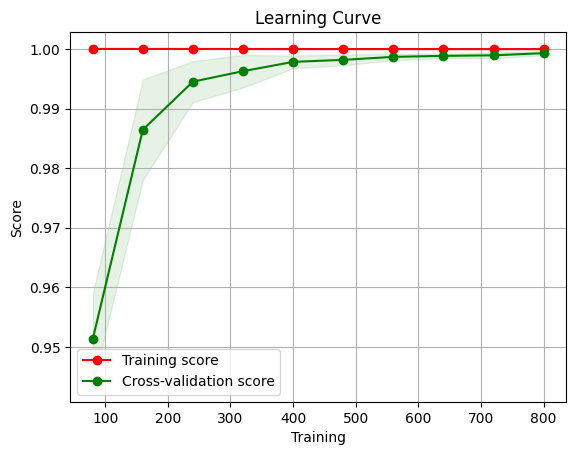

In [30]:
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")


plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


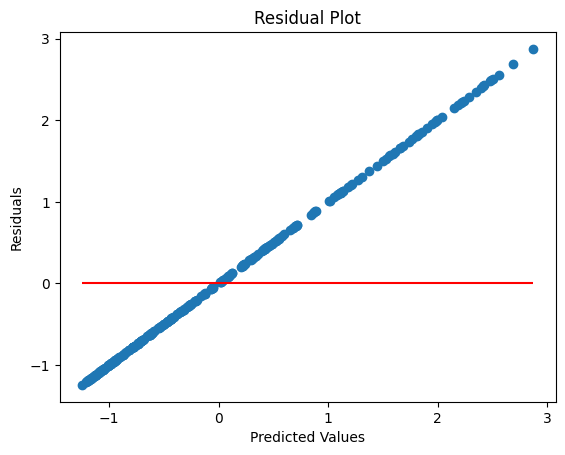

In [31]:
residuals = y_test - y_pred_cat

plt.scatter(x=y_pred_cat, y=y_pred_cat)
plt.hlines(y=0, xmin=min(y_pred_cat), xmax=max(y_pred_cat), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Lasso Model

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(x_train,y_train)


Lasso(alpha=0.1)

In [33]:
y_pred_lasso = lasso.predict(x_test)

In [34]:
print(f"MSE : {mean_squared_error(y_test,y_pred_lasso)}")
print(f"R2 Score : {r2_score(y_test,y_pred_lasso)}")

MSE : 0.011837466004038096
R2 Score : 0.9891564113113258


In [35]:
cv_scores = cross_val_score(lasso, x_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Val Score : {cv_scores * -1}")
print(f"Cross Val Score Mean: {cv_scores.mean() * -1}")
print(f"Cross Val Score Std: {cv_scores.std()}")

Cross Val Score : [0.01293704 0.00781961 0.00878158 0.01170609 0.00975577]
Cross Val Score Mean: 0.010200018126661192
Cross Val Score Std: 0.001878043201353143


In [36]:
train_sizes, train_scores, test_scores = learning_curve(
    Lasso(), x_scaled, y_scaled, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

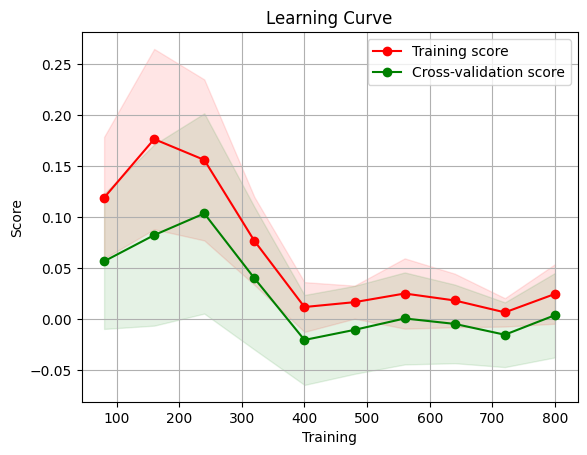

In [37]:
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")


plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

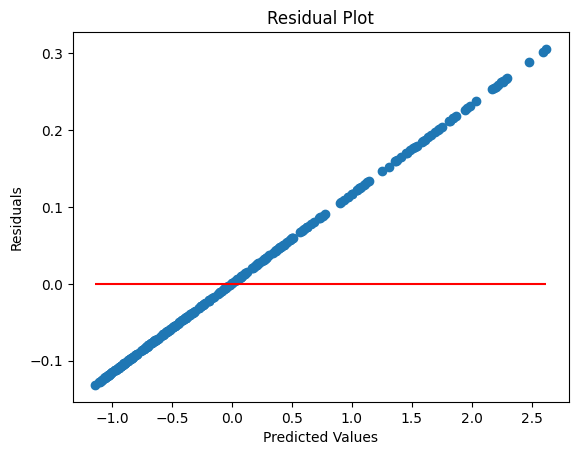

In [38]:
residuals = y_test.flatten() - y_pred_lasso

plt.scatter(x=y_pred_lasso, y=residuals)
plt.hlines(y=0, xmin=min(y_pred_lasso), xmax=max(y_pred_lasso), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Ridge Model

In [39]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)


Ridge()

In [40]:
y_pred_ridge = ridge.predict(x_test)


In [41]:
print(f"MSE : {mean_squared_error(y_test,y_pred_ridge)}")
print(f"R2 Score : {r2_score(y_test,y_pred_ridge)}")

MSE : 1.0176502727518364e-06
R2 Score : 0.9999990677919596


In [42]:
cv_scores = cross_val_score(ridge, x_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Val Score : {cv_scores * -1}")
print(f"Cross Val Score Mean: {cv_scores.mean() * -1}")
print(f"Cross Val Score Std: {cv_scores.std()}")

Cross Val Score : [7.75742701e-07 5.40690548e-07 6.45162539e-07 8.45471528e-07
 6.88247963e-07]
Cross Val Score Mean: 6.990630557948671e-07
Cross Val Score Std: 1.0527990488489054e-07


In [43]:
train_sizes, train_scores, test_scores = learning_curve(
    Ridge(), x_scaled, y_scaled, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

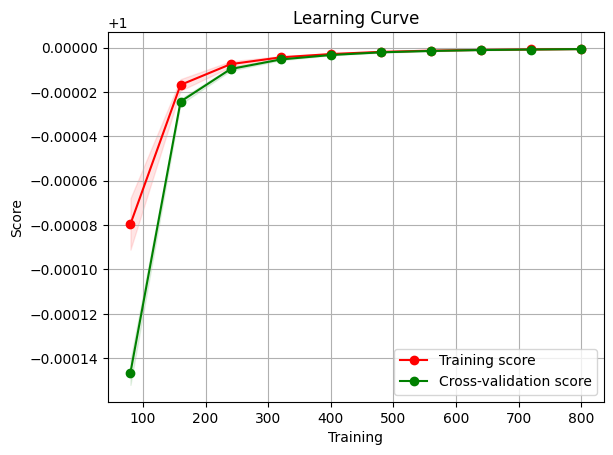

In [44]:
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")


plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

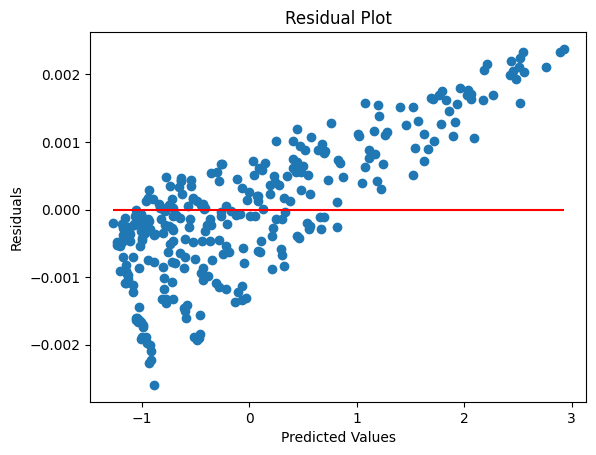

In [45]:
residuals = y_test - y_pred_ridge

plt.scatter(x=y_pred_ridge, y=residuals)
plt.hlines(y=0, xmin=min(y_pred_ridge), xmax=max(y_pred_ridge), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## ElasticNet Model

In [46]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)




ElasticNet(alpha=0.1)

In [47]:
y_pred_enet = elastic_net.predict(x_test)

In [48]:
print(f"MSE : {mean_squared_error(y_test,y_pred_enet)}")
print(f"R2 Score : {r2_score(y_test,y_pred_enet)}")

MSE : 0.006321573297979366
R2 Score : 0.9942091879558337


In [49]:
cv_scores = cross_val_score(elastic_net, x_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Val Score : {cv_scores * -1}")
print(f"Cross Val Score Mean: {cv_scores.mean() * -1}")
print(f"Cross Val Score Std: {cv_scores.std()}")

Cross Val Score : [0.00690767 0.00419188 0.00470385 0.0062555  0.00522135]
Cross Val Score Mean: 0.005456049439997265
Cross Val Score Std: 0.0009965280672920363


In [50]:
train_sizes, train_scores, test_scores = learning_curve(
    Ridge(), x_scaled, y_scaled, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

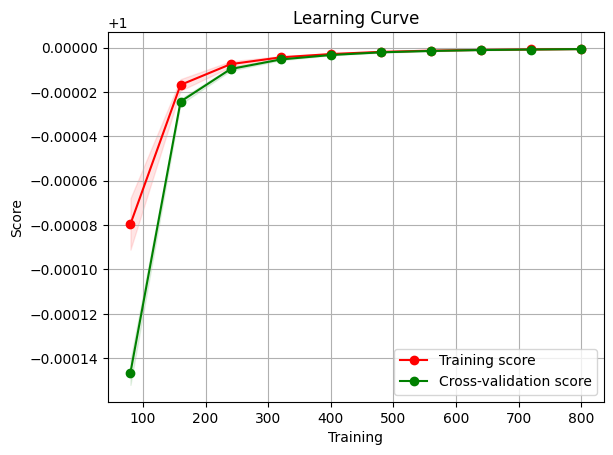

In [51]:
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")


plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

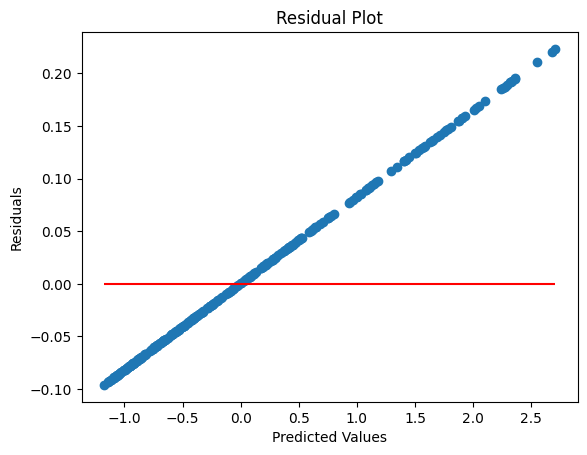

In [52]:
residuals = y_test.flatten() - y_pred_enet

plt.scatter(x=y_pred_enet, y=residuals)
plt.hlines(y=0, xmin=min(y_pred_enet), xmax=max(y_pred_enet), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()